In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression( max_iter=7000)
log_reg.fit(X_train,y_train)
decision_scores = log_reg.decision_function(X_test)

In [6]:
from ML.metrics import TPR,FPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores),0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores>= threshold, dtype='int')
    fprs.append(FPR(y_test,y_predict))
    tprs.append(TPR(y_test,y_predict))

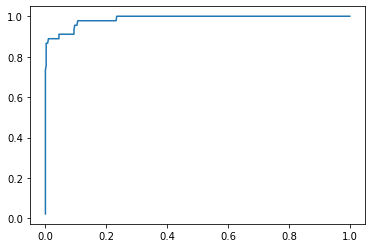

In [7]:
plt.plot(fprs,tprs)
plt.show()

### scikit-learn ROC曲线

In [8]:
from sklearn.metrics import roc_curve

fprs, tprs, threshold = roc_curve(y_test, decision_scores)

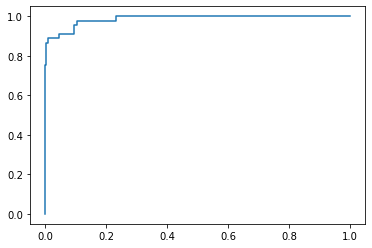

In [9]:
plt.plot(fprs,tprs)
plt.show()

In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,decision_scores)

0.9868861454046639